# Load Data

In [1]:
import pandas as pd

df = pd.read_csv("Speed Dating Data.csv", encoding="latin1", low_memory=False)
# Do not truncate the columns
pd.set_option("display.max_columns", None)
# Print the first 5 rows
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [2]:
df[["iid", "pid", "match"]].head(10)

,iid,pid,match
0,1,11.0,0
1,1,12.0,0
2,1,13.0,1
3,1,14.0,1
4,1,15.0,1
5,1,16.0,0
6,1,17.0,0
7,1,18.0,0
8,1,19.0,1
9,1,20.0,0


# Preprocess Data

In [3]:
features = [
    "age",
    "race",  # Dummy variable
    "imprace",
    "imprelig",
    "field_cd",  # Dummy variable
    # "undergra",  # Dummy variable
    "mn_sat",  # Needs reformatting
    "tuition",  # Needs reformatting
    "income",  # Needs reformatting
    "goal",  # Dummy variable
    "date",
    "go_out",
    "career_c",  # Dummy variable
    # Interest in Activities:
    "sports",
    "tvsports",
    "exercise",
    "dining",
    "museums",
    "art",
    "hiking",
    "gaming",
    "clubbing",
    "reading",
    "tv",
    "theater",
    "movies",
    "concerts",
    "music",
    "shopping",
    "yoga",
    # Your Preferences (Needs transformation):
    "attr1_1",
    "sinc1_1",
    "intel1_1",
    "fun1_1",
    "amb1_1",
    "shar1_1",
    # Self-Perception:
    "exphappy",
    "expnum",
    "attr3_1",
    "sinc3_1",
    "intel3_1",
    "fun3_1",
    "amb3_1",
    "attr5_1",
    "sinc5_1",
    "intel5_1",
    "fun5_1",
    "amb5_1",
]

features_to_reformat = ["mn_sat", "tuition", "income"]

categorical_features = [
    "race",
    "field_cd",
    # "undergra",
    "goal",
    "career_c",
]

target = "match"

In [4]:
df = df[["iid", "gender"] + features + [target]]
df.head()

,iid,gender,age,race,imprace,imprelig,field_cd,mn_sat,tuition,income,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,exphappy,expnum,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,match
0,1,0,21.0,4.0,2.0,4.0,1.0,NaN,NaN,"69,487.00",2.0,7.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,3.0,2.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,0
1,1,0,21.0,4.0,2.0,4.0,1.0,NaN,NaN,"69,487.00",2.0,7.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,3.0,2.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,0
2,1,0,21.0,4.0,2.0,4.0,1.0,NaN,NaN,"69,487.00",2.0,7.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,3.0,2.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1
3,1,0,21.0,4.0,2.0,4.0,1.0,NaN,NaN,"69,487.00",2.0,7.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,3.0,2.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1
4,1,0,21.0,4.0,2.0,4.0,1.0,NaN,NaN,"69,487.00",2.0,7.0,1.0,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,3.0,2.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1


In [5]:
# Inpute missing values with the most frequent value
df = df.fillna(df.mode().iloc[0])

df.head()

,iid,gender,age,race,imprace,imprelig,field_cd,mn_sat,tuition,income,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,exphappy,expnum,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,match
0,1,0,21.0,4.0,2.0,4.0,1.0,"1,400.00","26,908.00","69,487.00",2.0,7.0,1.0,2.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,3.0,2.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,8.0,8.0,9.0,0
1,1,0,21.0,4.0,2.0,4.0,1.0,"1,400.00","26,908.00","69,487.00",2.0,7.0,1.0,2.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,3.0,2.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,8.0,8.0,9.0,0
2,1,0,21.0,4.0,2.0,4.0,1.0,"1,400.00","26,908.00","69,487.00",2.0,7.0,1.0,2.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,3.0,2.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,8.0,8.0,9.0,1
3,1,0,21.0,4.0,2.0,4.0,1.0,"1,400.00","26,908.00","69,487.00",2.0,7.0,1.0,2.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,3.0,2.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,8.0,8.0,9.0,1
4,1,0,21.0,4.0,2.0,4.0,1.0,"1,400.00","26,908.00","69,487.00",2.0,7.0,1.0,2.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,3.0,2.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,8.0,8.0,9.0,1


In [6]:
# Aggregate rows by iid and compute a new column with the new match value being the mean of the match values and the rest of the columns stays the same as the first row
dict_agg = {col: "first" for col in ["gender"] + features}
dict_agg["match"] = "mean"

df = df.groupby("iid").agg(dict_agg).reset_index()

# If df["match"] is less than 0.5, the target is 0, otherwise it is 1
df["match"] = (df["match"] >= 0.5).astype(int)

df.head()

,iid,gender,age,race,imprace,imprelig,field_cd,mn_sat,tuition,income,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,exphappy,expnum,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,match
0,1,0,21.0,4.0,2.0,4.0,1.0,"1,400.00","26,908.00","69,487.00",2.0,7.0,1.0,2.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,15.0,20.0,20.0,15.0,15.0,15.0,3.0,2.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,8.0,8.0,9.0,0
1,2,0,24.0,2.0,2.0,5.0,1.0,"1,400.00","26,908.00","65,929.00",1.0,5.0,1.0,2.0,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,45.0,5.0,25.0,20.0,0.0,5.0,4.0,5.0,7.0,5.0,8.0,10.0,3.0,7.0,8.0,8.0,8.0,9.0,0
2,3,0,25.0,2.0,8.0,4.0,2.0,"1,400.00","26,908.00","55,080.00",6.0,3.0,1.0,2.0,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,35.0,10.0,35.0,10.0,10.0,0.0,4.0,2.0,8.0,9.0,9.0,8.0,8.0,7.0,8.0,8.0,8.0,9.0,0
3,4,0,23.0,2.0,1.0,1.0,1.0,"1,400.00","26,908.00","37,754.00",1.0,5.0,1.0,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,20.0,20.0,20.0,20.0,10.0,10.0,1.0,2.0,7.0,8.0,7.0,9.0,8.0,7.0,8.0,8.0,8.0,9.0,0
4,5,0,21.0,2.0,8.0,1.0,1.0,"1,400.00","26,908.00","86,340.00",2.0,4.0,1.0,1.0,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,20.0,5.0,25.0,25.0,10.0,15.0,7.0,10.0,6.0,3.0,10.0,6.0,8.0,7.0,8.0,8.0,8.0,9.0,0


In [7]:
# Set type of categorical features to category
for feature in categorical_features:
    df[feature] = df[feature].astype("category")

In [8]:
# Reformat features ("69,487.00" -> 69487.0)
for feature in features_to_reformat:
    df[feature] = df[feature].str.replace(",", "").astype(float)

In [9]:
# Transform "Your Preferences" columns
# For a person, among attr1_1, sinc1_1, intel1_1, fun1_1, amb1_1, shar1_1, the column with the highest value is the most important
# For example, if a person has the following values: attr1_1=10, sinc1_1=20, intel1_1=30, fun1_1=40, amb1_1=50, shar1_1=60
# The transformed columns will be: imp_attr1_1=6, imp_sinc1_1=5, imp_intel1_1=4, imp_fun1_1=3, imp_amb1_1=2, imp_shar1_1=1
# The columns are then dropped
df[["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]] = df[
    ["attr1_1", "sinc1_1", "intel1_1", "fun1_1", "amb1_1", "shar1_1"]
].apply(lambda x: x.rank(method="first", ascending=False), axis=1)

df.head()

,iid,gender,age,race,imprace,imprelig,field_cd,mn_sat,tuition,income,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,exphappy,expnum,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,match
0,1,0,21.0,4.0,2.0,4.0,1.0,1400.0,26908.0,69487.0,2.0,7.0,1.0,2.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,1.0,2.0,4.0,5.0,6.0,3.0,2.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,8.0,8.0,9.0,0
1,2,0,24.0,2.0,2.0,5.0,1.0,1400.0,26908.0,65929.0,1.0,5.0,1.0,2.0,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,1.0,4.0,2.0,3.0,6.0,5.0,4.0,5.0,7.0,5.0,8.0,10.0,3.0,7.0,8.0,8.0,8.0,9.0,0
2,3,0,25.0,2.0,8.0,4.0,2.0,1400.0,26908.0,55080.0,6.0,3.0,1.0,2.0,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,1.0,3.0,2.0,4.0,5.0,6.0,4.0,2.0,8.0,9.0,9.0,8.0,8.0,7.0,8.0,8.0,8.0,9.0,0
3,4,0,23.0,2.0,1.0,1.0,1.0,1400.0,26908.0,37754.0,1.0,5.0,1.0,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,3.0,4.0,5.0,6.0,1.0,2.0,7.0,8.0,7.0,9.0,8.0,7.0,8.0,8.0,8.0,9.0,0
4,5,0,21.0,2.0,8.0,1.0,1.0,1400.0,26908.0,86340.0,2.0,4.0,1.0,1.0,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,3.0,6.0,1.0,2.0,5.0,4.0,7.0,10.0,6.0,3.0,10.0,6.0,8.0,7.0,8.0,8.0,8.0,9.0,0


In [10]:
# One-hot encode categorical features
df = pd.get_dummies(
    df,
    columns=categorical_features,
    prefix=["dummy_" + x for x in categorical_features],
)

# Make new features variable
features = df.columns.tolist()  # Get a list of all columns

# Remove ["iid", "gender", "match"] from the list
for feature in ["iid", "gender", "match"]:
    features.remove(feature)

# Make new categorical features
categorical_features = [x for x in features if "dummy" in x]

df.head()

,iid,gender,age,imprace,imprelig,mn_sat,tuition,income,date,go_out,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,exphappy,expnum,attr3_1,sinc3_1,intel3_1,fun3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,match,dummy_race_1.0,dummy_race_2.0,dummy_race_3.0,dummy_race_4.0,dummy_race_6.0,dummy_field_cd_1.0,dummy_field_cd_2.0,dummy_field_cd_3.0,dummy_field_cd_4.0,dummy_field_cd_5.0,dummy_field_cd_6.0,dummy_field_cd_7.0,dummy_field_cd_8.0,dummy_field_cd_9.0,dummy_field_cd_10.0,dummy_field_cd_11.0,dummy_field_cd_12.0,dummy_field_cd_13.0,dummy_field_cd_14.0,dummy_field_cd_15.0,dummy_field_cd_16.0,dummy_field_cd_17.0,dummy_field_cd_18.0,dummy_goal_1.0,dummy_goal_2.0,dummy_goal_3.0,dummy_goal_4.0,dummy_goal_5.0,dummy_goal_6.0,dummy_career_c_1.0,dummy_career_c_2.0,dummy_career_c_3.0,dummy_career_c_4.0,dummy_career_c_5.0,dummy_career_c_6.0,dummy_career_c_7.0,dummy_career_c_8.0,dummy_career_c_9.0,dummy_career_c_10.0,dummy_career_c_11.0,dummy_career_c_12.0,dummy_career_c_13.0,dummy_career_c_14.0,dummy_career_c_15.0,dummy_career_c_16.0,dummy_career_c_17.0
0,1,0,21.0,2.0,4.0,1400.0,26908.0,69487.0,7.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,1.0,2.0,4.0,5.0,6.0,3.0,2.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,8.0,8.0,9.0,0,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,0,24.0,2.0,5.0,1400.0,26908.0,65929.0,5.0,1.0,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,1.0,4.0,2.0,3.0,6.0,5.0,4.0,5.0,7.0,5.0,8.0,10.0,3.0,7.0,8.0,8.0,8.0,9.0,0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,3,0,25.0,8.0,4.0,1400.0,26908.0,55080.0,3.0,1.0,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,1.0,3.0,2.0,4.0,5.0,6.0,4.0,2.0,8.0,9.0,9.0,8.0,8.0,7.0,8.0,8.0,8.0,9.0,0,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,4,0,23.0,1.0,1.0,1400.0,26908.0,37754.0,5.0,1.0,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,7.0,7.0,7.0,9.0,7.0,8.0,7.0,1.0,8.0,1.0,2.0,3.0,4.0,5.0,6.0,1.0,2.0,7.0,8.0,7.0,9.0,8.0,7.0,8.0,8.0,8.0,9.0,0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,5,0,21.0,8.0,1.0,1400.0,26908.0,86340.0,4.0,1.0,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,8.0,6.0,8.0,6.0,6.0,3.0,7.0,8.0,3.0,3.0,6.0,1.0,2.0,5.0,4.0,7.0,10.0,6.0,3.0,10.0,6.0,8.0,7.0,8.0,8.0,8.0,9.0,0,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [11]:
male_df = df[df["gender"] == 1]
female_df = df[df["gender"] == 0]

X = male_df[features]
y = male_df[target]

# Turn boolean values into integers
X = X.astype(int)
y = y.astype(int)

X.shape, y.shape

((277, 89), (277,))

# Principal Component Analysis

Text(0.5, 1.0, 'Cumulative explained variance ratio')

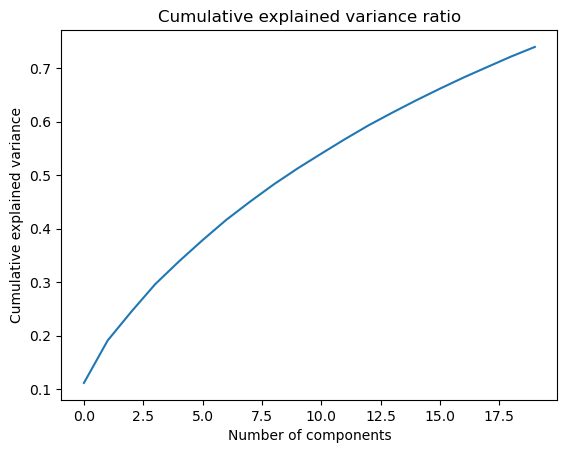

In [12]:
# Scale non-categorical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# Fit and transform the columns not in categorical_features
X_scaled = X.copy()
X_scaled[X.columns.difference(categorical_features)] = scaler.fit_transform(
    X[X.columns.difference(categorical_features)]
)

# Apply PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=20)
X_pca = pca.fit_transform(X_scaled)

# Plot the cumulative explained variance ratio
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Cumulative explained variance ratio")

Text(0.5, 1.0, 'First two components of PCA')

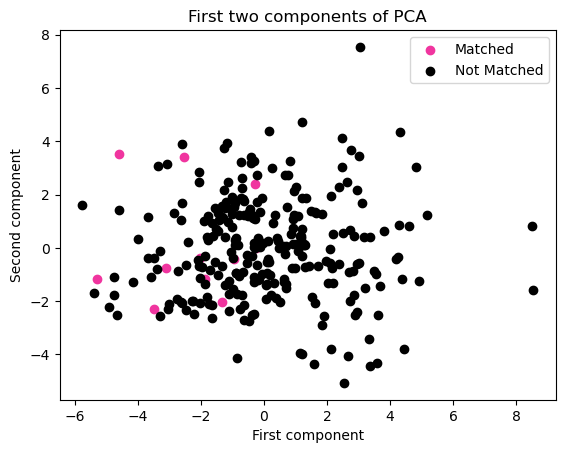

In [13]:
# Plot the first two components
plt.scatter(
    X_pca[male_df[target] == 1, 0],
    X_pca[male_df[target] == 1, 1],
    c="#F0359F",
    label="Matched",
)
plt.scatter(
    X_pca[male_df[target] == 0, 0],
    X_pca[male_df[target] == 0, 1],
    c="black",
    label="Not Matched",
)
plt.xlabel("First component")
plt.ylabel("Second component")
plt.legend()
plt.title("First two components of PCA")

In [14]:
# Plot the first three components
import plotly.express as px

fig = px.scatter_3d(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    z=X_pca[:, 2],
    color=male_df[target].map({0: "Not Matched", 1: "Matched"}),
    color_discrete_sequence=["black", "#F0359F"],
)
fig.show()

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  sf: grouped.get_group(s if len(s) > 1 else s[0])


# XGBoost

## Raw XGBoost

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)

In [16]:
import xgboost as xgb

model = xgb.XGBClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    f1_score,
    classification_report,
    confusion_matrix,
)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(pd.DataFrame({"Accuracy": [accuracy], "ROC AUC": [roc_auc], "F1": [f1]}))
print(report)
print(confusion)

   Accuracy   ROC AUC   F1
0  0.954955  0.495327  0.0
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       107
           1       0.00      0.00      0.00         4

    accuracy                           0.95       111
   macro avg       0.48      0.50      0.49       111
weighted avg       0.93      0.95      0.94       111

[[106   1]
 [  4   0]]


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

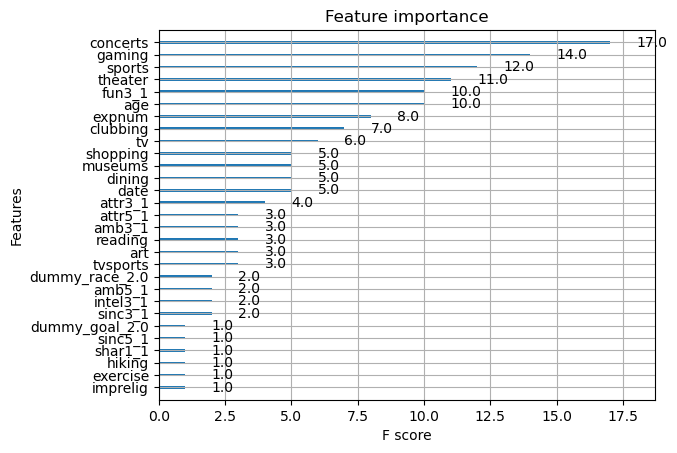

In [17]:
# Plot the feature importance
xgb.plot_importance(model)

## Resampled Data with XGBoost

In [18]:
# Use oversampling to balance the dataset
from imblearn.over_sampling import SMOTE

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

smote_2 = SMOTE()
X_resampled, y_resampled = smote_2.fit_resample(X, y)

In [19]:
model_resampled = xgb.XGBClassifier()
model_resampled.fit(X_train_resampled, y_train_resampled)

y_pred_resampled = model_resampled.predict(X_test)

accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
roc_auc_resampled = roc_auc_score(y_test, y_pred_resampled)
f1_resampled = f1_score(y_test, y_pred_resampled)
report_resampled = classification_report(y_test, y_pred_resampled)
confusion_resampled = confusion_matrix(y_test, y_pred_resampled)

print(
    pd.DataFrame(
        {
            "Accuracy": [accuracy_resampled],
            "ROC AUC": [roc_auc_resampled],
            "F1": [f1_resampled],
        }
    )
)
print(report_resampled)
# Print the confusion matrix with labels
print(
    pd.DataFrame(
        confusion_resampled,
        index=["Actual 0", "Actual 1"],
        columns=["Predicted 0", "Predicted 1"],
    )
)

   Accuracy   ROC AUC        F1
0  0.936937  0.726636  0.363636
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       107
           1       0.29      0.50      0.36         4

    accuracy                           0.94       111
   macro avg       0.63      0.73      0.67       111
weighted avg       0.96      0.94      0.95       111

          Predicted 0  Predicted 1
Actual 0          102            5
Actual 1            2            2


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

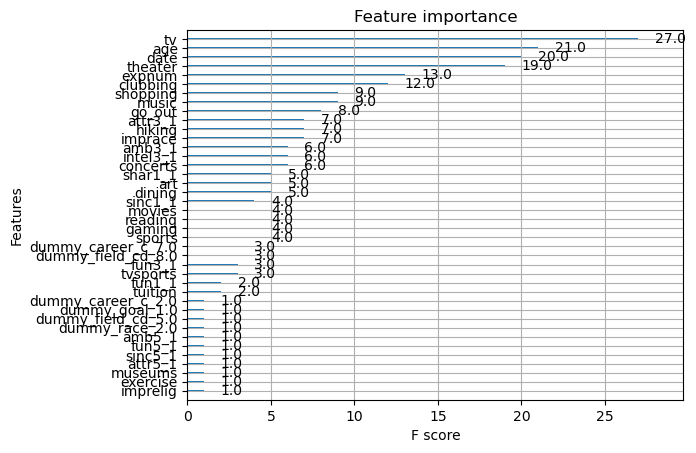

In [20]:
# Plot the feature importance
xgb.plot_importance(model_resampled)

Text(0.5, 1.0, 'First two components of PCA')

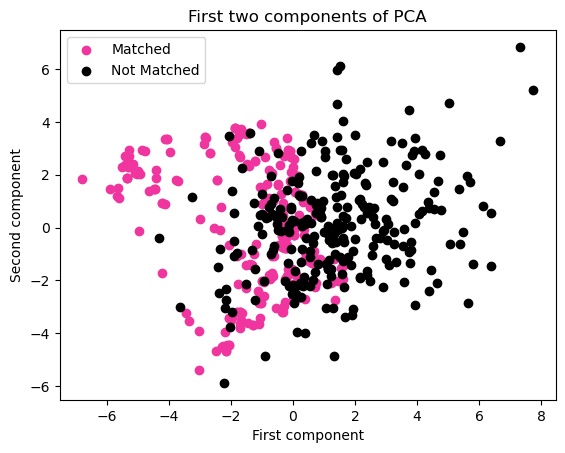

In [21]:
# Use PCA on the resampled dataset
scaler_resampled = StandardScaler()
X_resampled_scaled = X_resampled.copy()
X_resampled_scaled[X_resampled.columns.difference(categorical_features)] = (
    scaler_resampled.fit_transform(
        X_resampled[X_resampled.columns.difference(categorical_features)]
    )
)

pca_resampled = PCA(n_components=20)
X_resampled_pca = pca_resampled.fit_transform(X_resampled_scaled)

# Plot the first two components
plt.scatter(
    X_resampled_pca[y_resampled == 1, 0],
    X_resampled_pca[y_resampled == 1, 1],
    c="#F0359F",
    label="Matched",
)
plt.scatter(
    X_resampled_pca[y_resampled == 0, 0],
    X_resampled_pca[y_resampled == 0, 1],
    c="black",
    label="Not Matched",
)
plt.xlabel("First component")
plt.ylabel("Second component")
plt.legend()
plt.title("First two components of PCA")

In [22]:
# Plot the first three components
fig_resampled = px.scatter_3d(
    x=X_resampled_pca[:, 0],
    y=X_resampled_pca[:, 1],
    z=X_resampled_pca[:, 2],
    color=y_resampled.map({0: "Not Matched", 1: "Matched"}),
    color_discrete_sequence=["black", "#F0359F"],
)
fig_resampled.show()

/opt/homebrew/Caskroom/miniconda/base/envs/datascience/lib/python3.11/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



In [23]:
html = fig_resampled.to_html()
with open("pca.html", "w") as f:
    f.write(html)

# Linear Discriminant Analysis

Text(0, 0.5, 'Target')

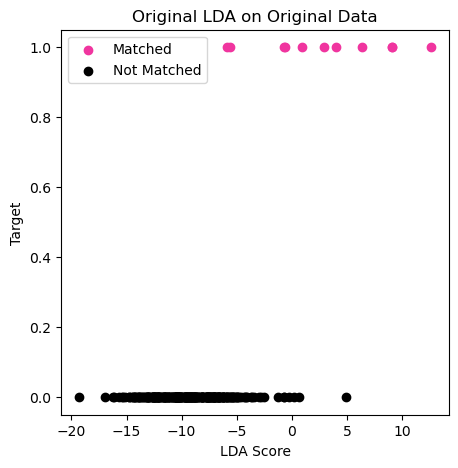

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Apply LDA on the original scaled dataset
lda = LinearDiscriminantAnalysis()
lda.fit(X_scaled, y)
X_lda = lda.transform(X_scaled)
X_lda_scores = lda.decision_function(X_scaled)

# Apply LDA on the resampled scaled dataset
lda_resampled = LinearDiscriminantAnalysis()
lda_resampled.fit(X_resampled_scaled, y_resampled)
X_lda_resampled = lda_resampled.transform(X_resampled_scaled)
X_lda_resampled_scores = lda_resampled.decision_function(X_resampled_scaled)
X_lda_resampled_original = lda_resampled.transform(X_scaled)
X_lda_resampled_original_scores = lda_resampled.decision_function(X_scaled)

# Plot original data
plt.figure(figsize=(5, 5))
plt.scatter(X_lda_scores[y == 1], y[y == 1], c="#F0359F", label="Matched")
plt.scatter(X_lda_scores[y == 0], y[y == 0], c="black", label="Not Matched")
plt.legend()
plt.title("Original LDA on Original Data")
plt.xlabel("LDA Score")
plt.ylabel("Target")

In [25]:
import pickle

# Save the lda_resampled model
with open("lda_resampled.pkl", "wb") as f:
    pickle.dump(lda_resampled, f, protocol=5)

Text(0, 0.5, 'Target')

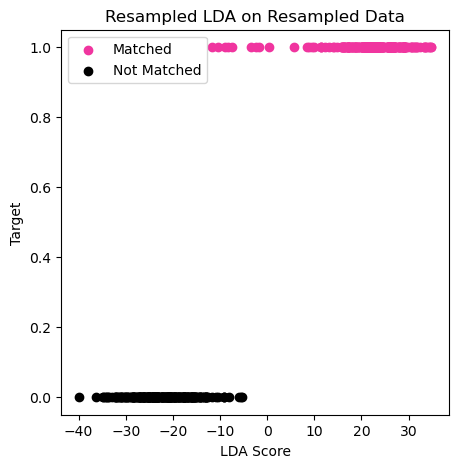

In [26]:
# Plot resampled data
plt.figure(figsize=(5, 5))
plt.scatter(
    X_lda_resampled_scores[y_resampled == 1],
    y_resampled[y_resampled == 1],
    c="#F0359F",
    label="Matched",
)
plt.scatter(
    X_lda_resampled_scores[y_resampled == 0],
    y_resampled[y_resampled == 0],
    c="black",
    label="Not Matched",
)
plt.legend()
plt.title("Resampled LDA on Resampled Data")
plt.xlabel("LDA Score")
plt.ylabel("Target")

Text(0, 0.5, 'Target')

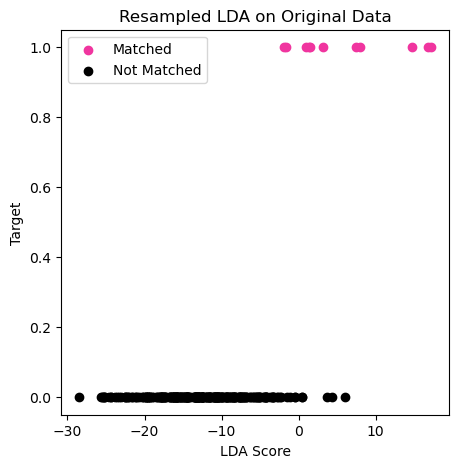

In [27]:
# Plot resampled original data
plt.figure(figsize=(5, 5))
plt.scatter(
    X_lda_resampled_original_scores[y == 1],
    y[y == 1],
    c="#F0359F",
    label="Matched",
)
plt.scatter(
    X_lda_resampled_original_scores[y == 0],
    y[y == 0],
    c="black",
    label="Not Matched",
)
plt.legend()
plt.title("Resampled LDA on Original Data")
plt.xlabel("LDA Score")
plt.ylabel("Target")

Text(0.5, 1.0, 'Resampled LDA Coefficients')

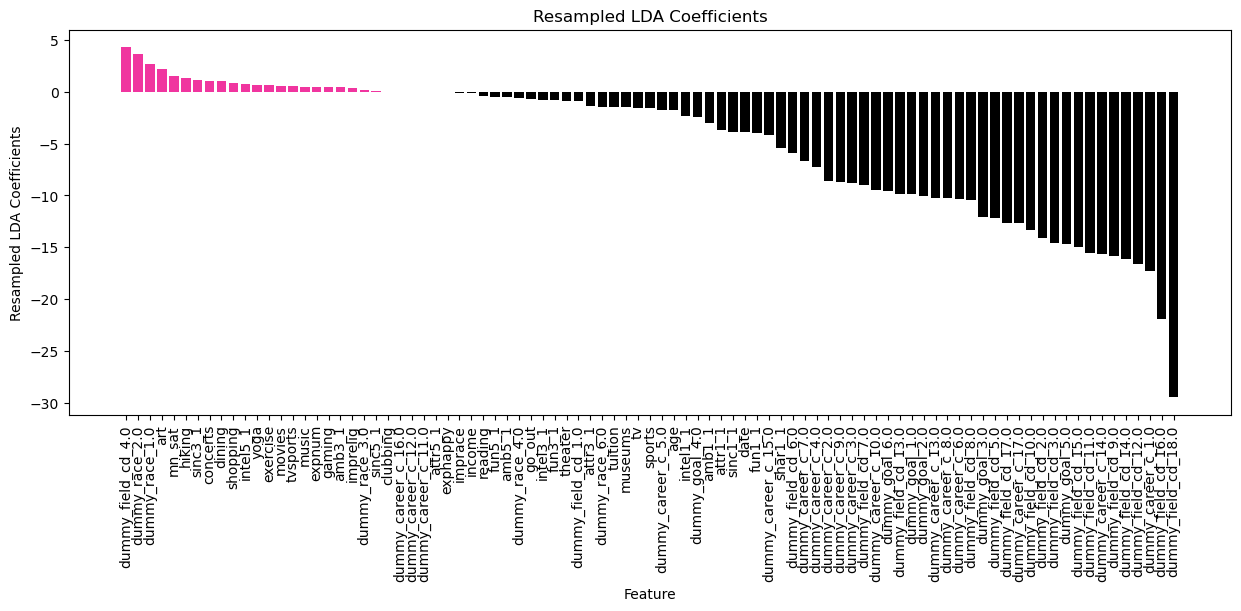

In [28]:
# Create a dataframe with the LDA coefficients and the features
lda_df = pd.DataFrame(
    {
        "Feature": features,
        "LDA Coefficient": lda.coef_[0],
        "LDA Coefficient Abs": abs(lda.coef_[0]),
    }
)
lda_df = lda_df.sort_values("LDA Coefficient", ascending=False)

# Create a dataframe with the resampled LDA coefficients and the features
lda_df_resampled = pd.DataFrame(
    {
        "Feature": features,
        "Resampled LDA Coefficient": lda_resampled.coef_[0],
        "Resampled LDA Coefficient Abs": abs(lda_resampled.coef_[0]),
    }
)

lda_df_resampled = lda_df_resampled.sort_values(
    "Resampled LDA Coefficient", ascending=False
)

# Plot the LDA coefficients
plt.figure(figsize=(15, 5))
plt.bar(
    lda_df_resampled["Feature"],
    lda_df_resampled["Resampled LDA Coefficient"],
    color=[
        "#F0359F" if x > 0 else "black"
        for x in lda_df_resampled["Resampled LDA Coefficient"]
    ],
)
plt.xlabel("Feature")
plt.xticks(rotation=90)
plt.ylabel("Resampled LDA Coefficients")
plt.title("Resampled LDA Coefficients")

Text(0.5, 1.0, 'Resampled LDA Coefficients')

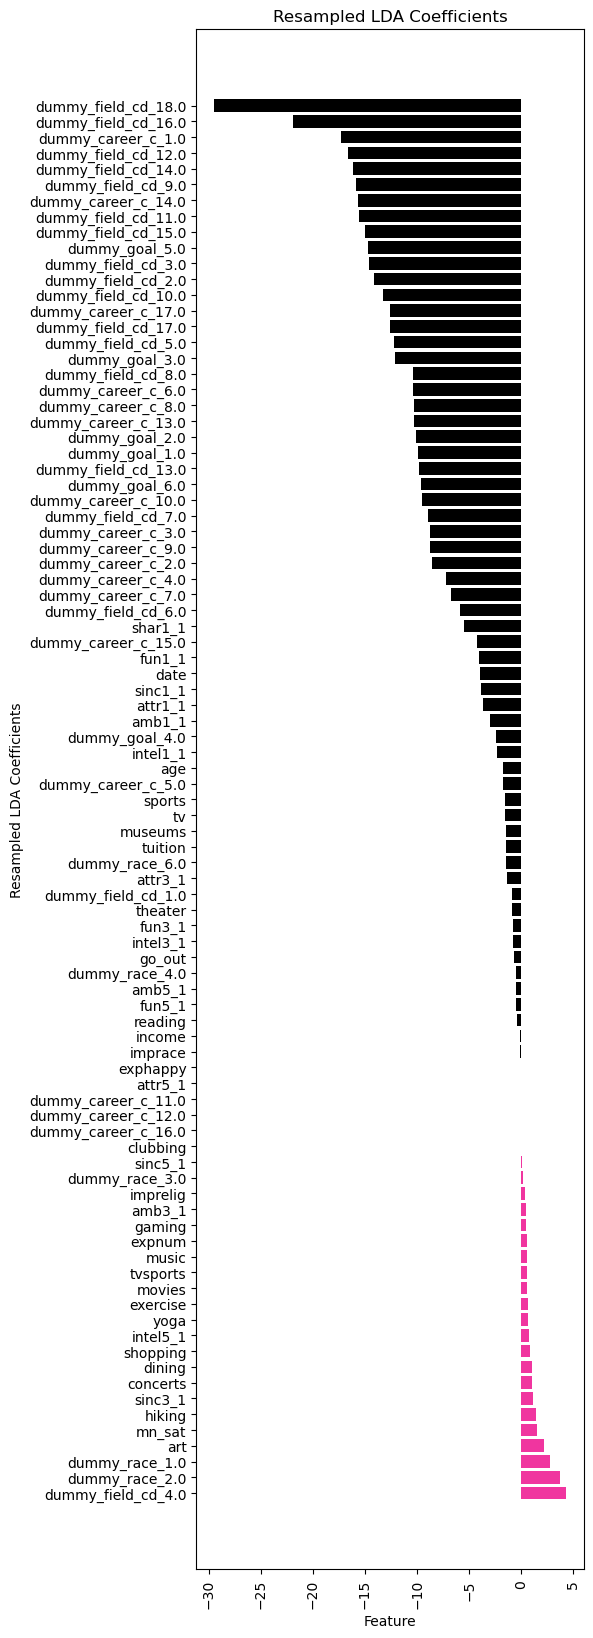

In [29]:
# Plot the LDA coefficients
plt.figure(figsize=(5, 20))
plt.barh(
    lda_df_resampled["Feature"],
    lda_df_resampled["Resampled LDA Coefficient"],
    color=[
        "#F0359F" if x > 0 else "black"
        for x in lda_df_resampled["Resampled LDA Coefficient"]
    ],
)
plt.xlabel("Feature")
plt.xticks(rotation=90)
plt.ylabel("Resampled LDA Coefficients")
plt.title("Resampled LDA Coefficients")

In [30]:
# Select the top 5 positive and negative features in the resampled LDA coefficients
lda_df_resampled.sort_values("Resampled LDA Coefficient", ascending=False).head(10)

,Feature,Resampled LDA Coefficient,Resampled LDA Coefficient Abs
51,dummy_field_cd_4.0,4.307035,4.307035
44,dummy_race_2.0,3.682516,3.682516
43,dummy_race_1.0,2.734180,2.734180
13,art,2.175360,2.175360
3,mn_sat,1.546382,1.546382
14,hiking,1.382104,1.382104
34,sinc3_1,1.154814,1.154814
21,concerts,1.028478,1.028478
11,dining,1.026211,1.026211
23,shopping,0.855402,0.855402


In [31]:
lda_df_resampled.sort_values("Resampled LDA Coefficient", ascending=True).head(30)

,Feature,Resampled LDA Coefficient,Resampled LDA Coefficient Abs
65,dummy_field_cd_18.0,-29.486130,29.486130
63,dummy_field_cd_16.0,-21.898074,21.898074
72,dummy_career_c_1.0,-17.305705,17.305705
59,dummy_field_cd_12.0,-16.617794,16.617794
61,dummy_field_cd_14.0,-16.148687,16.148687
56,dummy_field_cd_9.0,-15.892909,15.892909
85,dummy_career_c_14.0,-15.640417,15.640417
58,dummy_field_cd_11.0,-15.526396,15.526396
62,dummy_field_cd_15.0,-14.976682,14.976682
70,dummy_goal_5.0,-14.659188,14.659188


In [32]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Split X_scaled into X_scaled_train and X_scaled_test
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.4, stratify=y, random_state=42
)

# Use SMOTE to oversample the training set
smote = SMOTE()
X_scaled_train_resampled, y_train_resampled = smote.fit_resample(
    X_scaled_train, y_train
)

# Apply LDA on the original training set
lda = LinearDiscriminantAnalysis()
lda.fit(X_scaled_train, y_train)

# Apply LDA on the resampled training set
lda_resampled = LinearDiscriminantAnalysis()
lda_resampled.fit(X_scaled_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred = lda.predict_proba(X_scaled_test)[:, 1]
y_pred = (y_pred >= 0.5).astype(int)
y_pred_resampled = lda_resampled.predict_proba(X_scaled_test)[:, 1]
y_pred_resampled = (y_pred_resampled >= 0.5).astype(int)

# Compute the accuracy, ROC AUC, and F1 score of the original LDA
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Compute the accuracy, ROC AUC, and F1 score of the resampled LDA
accuracy_resampled = accuracy_score(y_test, y_pred_resampled)
roc_auc_resampled = roc_auc_score(y_test, y_pred_resampled)
f1_resampled = f1_score(y_test, y_pred_resampled)

# Print the results
print(
    pd.DataFrame(
        {
            "Accuracy": [accuracy, accuracy_resampled],
            "ROC AUC": [roc_auc, roc_auc_resampled],
            "F1": [f1, f1_resampled],
        },
        index=["Original LDA", "Resampled LDA"],
    )
)

# Print the classification report of the original LDA
print(f"Original LDA:\n{classification_report(y_test, y_pred)}")

# Print the classification report of the resampled LDA
print(f"Resampled LDA:\n{classification_report(y_test, y_pred_resampled)}")

# Print the confusion matrix of the original LDA
print(
    pd.DataFrame(
        confusion_matrix(y_test, y_pred),
        index=["Actual 0", "Actual 1"],
        columns=["Predicted 0", "Predicted 1"],
    )
)

# Print the confusion matrix of the resampled LDA
print(
    pd.DataFrame(
        confusion_matrix(y_test, y_pred_resampled),
        index=["Actual 0", "Actual 1"],
        columns=["Predicted 0", "Predicted 1"],
    )
)

               Accuracy   ROC AUC   F1
Original LDA   0.909910  0.471963  0.0
Resampled LDA  0.918919  0.476636  0.0
Original LDA:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       107
           1       0.00      0.00      0.00         4

    accuracy                           0.91       111
   macro avg       0.48      0.47      0.48       111
weighted avg       0.93      0.91      0.92       111

Resampled LDA:
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       107
           1       0.00      0.00      0.00         4

    accuracy                           0.92       111
   macro avg       0.48      0.48      0.48       111
weighted avg       0.93      0.92      0.92       111

          Predicted 0  Predicted 1
Actual 0          101            6
Actual 1            4            0
          Predicted 0  Predicted 1
Actual 0          102            5
Actual 1            4    

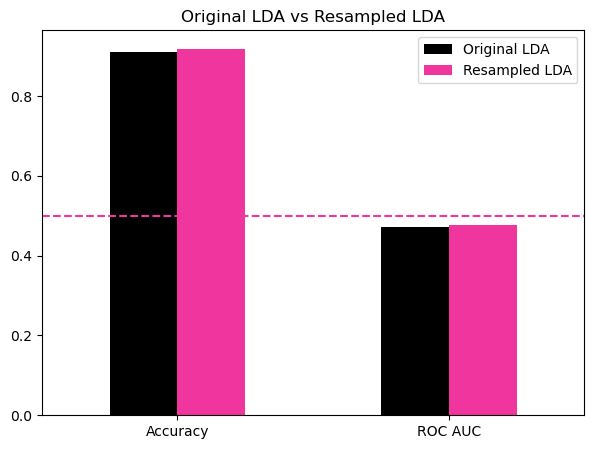

In [33]:
# Plot Accuracy   ROC AUC    F1 in a bar chart
pd.DataFrame(
    {
        "Accuracy": [accuracy, accuracy_resampled],
        "ROC AUC": [roc_auc, roc_auc_resampled],
    },
    index=["Original LDA", "Resampled LDA"],
).transpose().plot(
    kind="bar",
    figsize=(7, 5),
    title="Original LDA vs Resampled LDA",
    color=["black", "#F0359F"],
    # Write xlabel horizontally
    rot=0,
)
# Add a horizontal line at 0.5 to the plot
plt.axhline(y=0.5, color="#F0359F", linestyle="--")